In [2]:
import pandas as pd
import numpy as np
#import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tq

In [3]:
df = pd.read_table('/Users/jaredlorince/Desktop/5759068.txt',header=None,nrows=None,names=['song_id','artist_id','ts'],parse_dates=['ts'])

In [4]:
encountered = set()
new = []
blocks = []
last = None
block_idx = -1
for a in df.artist_id:
    if a not in encountered:
        new.append(1)
        encountered.add(a)
    else:
        new.append(0)
    if a != last:
        block_idx += 1
    blocks.append(block_idx)
    last = a
df['new'] = new
df['block'] = blocks
df['new_block'] = df['new'].cumsum()

In [117]:
df_blocked = df.groupby('block').aggregate({'artist_id':lambda x: x.iloc[0],'song_id':lambda x: len(x)})

In [118]:
new = []
encountered = set()
for a in df_blocked.artist_id:
    if a not in encountered:
        new.append(1)
        encountered.add(a)
    else:
        new.append(0)
df_blocked['new'] = new
df_blocked.columns = ['artist_id','n','new']

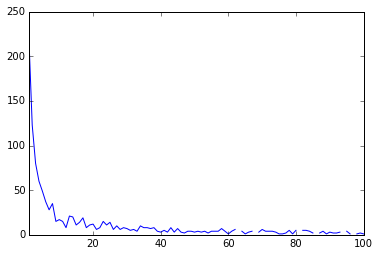

In [129]:
df_blocked['new_block'] = df_blocked.new.cumsum()
df_blocked[df_blocked.new==0].groupby('new_block').n.sum().value_counts().reindex(range(1,101)).plot()

In [22]:
result = np.zeros((1000,100),dtype=float)
for rep in tq(range(1000)):
    df_shuffle = df.sample(frac=1).reset_index(drop=True)
    encountered = set()
    new = []
    for a in df_shuffle.artist_id:
        if a not in encountered:
            new.append(1)
            encountered.add(a)
        else:
            new.append(0)
    df_shuffle['new'] = new
    df_shuffle['new_block'] = df_shuffle['new'].cumsum()
    #result[rep] = df_shuffle.groupby(df_shuffle.index/1000).new.mean().values
    result[rep] = df_shuffle[df_shuffle.new==0].groupby('new_block').artist_id.count().value_counts().reindex(range(1,101),fill_value=0).values
    break

In [130]:
result = np.zeros((1000,100),dtype=float)
for rep in tq(xrange(1000)):
    df_shuffle = df_blocked.sample(frac=1).reset_index(drop=True)
    encountered = set()
    new = []
    for a in df_shuffle.artist_id:
        if a not in encountered:
            new.append(1)
            encountered.add(a)
        else:
            new.append(0)
    df_shuffle['new'] = new
    df_shuffle['new_block'] = df_shuffle['new'].cumsum()
    #result[rep] = df_shuffle.groupby(df_shuffle.index/1000).new.mean().values
    result[rep] = df_shuffle[df_shuffle.new==0].groupby('new_block').artist_id.count().value_counts().reindex(range(1,101),fill_value=0).values

In [5]:
exploit_streak = [np.nan]
streak = 0
for n in df.new:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df['exploit_streak'] = exploit_streak[:-1]
    

In [23]:
exploit_streak = [np.nan]
streak = 0
for n in df_shuffle.new:
    if n==0:
        streak +=1 
        exploit_streak.append(streak)
    else:
        exploit_streak.append(0)
        streak = 0
df_shuffle['exploit_streak'] = exploit_streak[:-1]
    

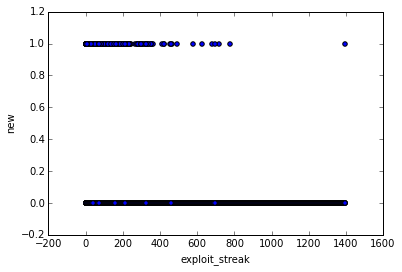

In [148]:
df.plot(kind='scatter',x='exploit_streak',y='new')

In [172]:
import statsmodels.api as sm
import statsmodels
test = statsmodels.tools.add_constant(df)
logit = sm.Logit(df['new'][1:], [testtest['const'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.138915
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        12:30:30   Log-Likelihood:                -8172.6
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -3.4354      0.024   -144.887      0.000        -3.482    -3.389


In [169]:
logit = sm.Logit(df_shuffle['new'][1:], df_shuffle['exploit_streak'][1:])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.264124
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58831
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 -0.9013
Time:                        12:29:39   Log-Likelihood:                -15539.
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                       nan
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
exploit_streak    -0.1099      0.001    -98.269      0.000        -0.112    -0.108


In [18]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ 1', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.138971
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58833
Model:                          Logit   Df Residuals:                    58832
Method:                           MLE   Df Model:                            0
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                   0.000
Time:                        13:06:34   Log-Likelihood:                -8176.1
converged:                       True   LL-Null:                       -8176.1
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4348      0.024   -144.902      0.000        -3.481    -3.388
==============================================================================
"""

In [19]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak', data = df).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.128932
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 0.07186
Time:                        13:06:44   Log-Likelihood:                -7585.3
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                2.023e-257
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -2.6427      0.031    -84.541      0.000        -2.704    -2.581
exploit_streak    -0.0150      0.001    -23.498      0.000        -0.016    -0.014
==================================================================================
"""

In [24]:
from statsmodels.formula.api import logit
l = logit(formula = 'new ~ exploit_streak', data = df_shuffle).fit()
l.summary()

Optimization terminated successfully.
         Current function value: 0.135871
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    new   No. Observations:                58832
Model:                          Logit   Df Residuals:                    58830
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jan 2017   Pseudo R-squ.:                 0.02191
Time:                        13:08:38   Log-Likelihood:                -7993.5
converged:                       True   LL-Null:                       -8172.6
                                        LLR p-value:                 6.927e-80
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -3.0160      0.031    -96.416      0.000        -3.077    -2.955
exploit_streak    -0.0103      0.001    -15.876      0.000        -0.012    -0.009
==================================================================================
"""

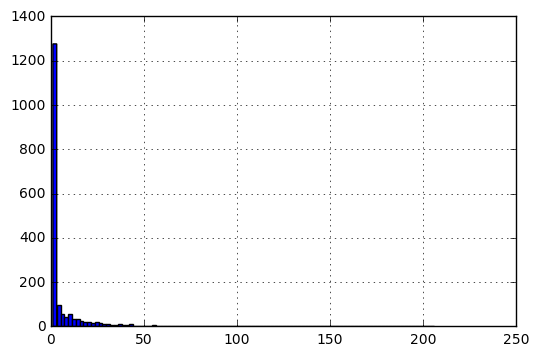

In [78]:
df.groupby('artist_id').apply(lambda x: len(x.song_id.unique())).hist(bins=100)

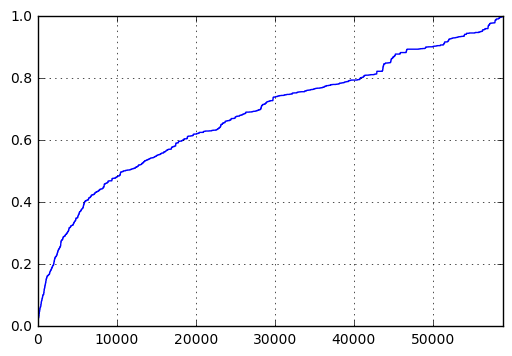

In [82]:
(df.new.cumsum() / float(len(df.artist_id.unique()))).plot(grid=True)

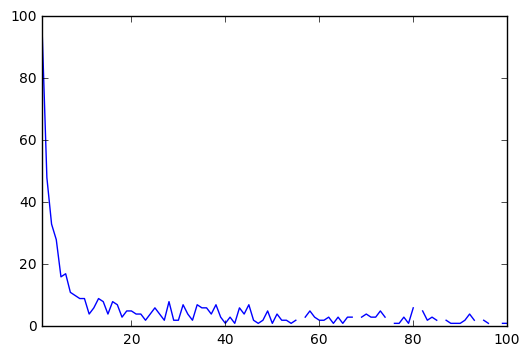

In [96]:
df[10788:][df[10788:].new==0].groupby('new_block').song_id.count().value_counts().sort_index().reindex(range(1,101)).plot()

In [95]:
((df.new.cumsum() / float(len(df.artist_id.unique())))<.5).sum()

10788

In [115]:
vcc = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index().cumsum()

In [175]:
x = df[df.new==0].groupby('new_block').song_id.count().value_counts().sort_index()
x = x[::-1].cumsum()[::-1]

(0.8, 1)

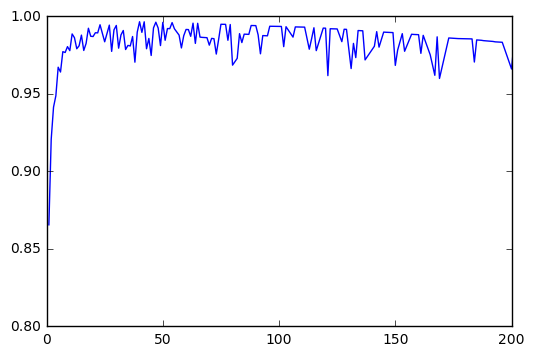

In [158]:
fig,ax = plt.subplots(1,1)
(x.shift(-1) / x).plot(ax=ax)
ax.set_xlim(0,200)
ax.set_ylim(.8,1)

In [187]:
result = (x.shift(-1) / x)

In [199]:
x

1       1320
2       1097
3        978
4        897
5        840
6        789
7        751
8        718
9        683
10       666
11       648
12       634
13       623
14       602
15       584
16       573
17       559
18       539
19       532
20       520
21       508
22       501
23       491
24       477
25       467
26       454
27       447
28       438
29       430
30       424
        ... 
296       32
297       30
306       28
310       27
320       26
324       25
326       24
327       23
329       22
333       21
334       20
348       19
349       18
354       17
356       16
360       15
412       14
419       13
420       12
456       11
459       10
466        9
490        8
576        7
624        6
679        5
694        4
716        3
776        2
1397       1
Name: song_id, dtype: int64

In [198]:
x

1       1320
2       1097
3        978
4        897
5        840
6        789
7        751
8        718
9        683
10       666
11       648
12       634
13       623
14       602
15       584
16       573
17       559
18       539
19       532
20       520
21       508
22       501
23       491
24       477
25       467
26       454
27       447
28       438
29       430
30       424
        ... 
296       32
297       30
306       28
310       27
320       26
324       25
326       24
327       23
329       22
333       21
334       20
348       19
349       18
354       17
356       16
360       15
412       14
419       13
420       12
456       11
459       10
466        9
490        8
576        7
624        6
679        5
694        4
716        3
776        2
1397       1
Name: song_id, dtype: int64